# Python Training

Welcome to Python training at 84.51$^\circ$! The tutorial is in 6 parts: <br>
   >  Python Basics<br>
    > Numpy<br>
    > Matplotlib<br>
   > Pandas<br>
   > 84.51$^\circ$ Specific<br>
   > Small case study<br>

By the end, you'll hopefully have a good enough understanding of Python to get working on your own projects

# Pandas

Pandas is a package which is built by data analysts for data analysts. It is one of the most comprehensive and widely used packages for anyone who wants to be working with tables and dataframes. It can be imported as below:

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

### Basics of a DataFrame

A **DataFrame** can be made very easily by a lot of different objects. For example, passing in any sort of numpy array will create a DataFrame corresponding to that array. You can also pass in a dictionary of columns, where the key is the column name and the values are all things that are (or can be converted to) a datatype called a **series**, the pandas equivalent of an array. The two ways of creating DataFrames are shown below. 

In [5]:
pd.DataFrame(np.random.randn(2,3), columns=("First", "Second", "Third"))

,First,Second,Third
0,0.272423,-1.522717,0.945973
1,-0.825258,-0.126072,-0.080812


In [6]:
pd.DataFrame({'First': np.array([1,2,3,4]),
             'Second': pd.Series([np.nan,10,12,7]), 
             'Third': 1.,
             'Fourth': pd.date_range('20170401', periods=4, freq='m')})

,First,Fourth,Second,Third
0,1,2017-04-30,NaN,1.0
1,2,2017-05-31,10.0,1.0
2,3,2017-06-30,12.0,1.0
3,4,2017-07-31,7.0,1.0


In the one above, you can also see a new function called `pd.date_range`, which is a nice if your data in each row is a different point in time. You can index your table's rows as a date range as shown below: 

In [11]:
df = pd.DataFrame(np.random.randn(4,3), columns=("First", "Second", "Third"), index=pd.date_range('20170401', periods=4, freq='m'))
df

,First,Second,Third
2017-04-30,0.394067,0.540820,1.063477
2017-05-31,0.289224,0.283062,-0.419476
2017-06-30,1.636287,-0.176349,-0.626471
2017-07-31,0.559219,-0.297329,-0.777106


Here are some common functions used to view some more information and play around with your dataframe: 
 * `df.head()` and `df.tail()` get the top 5/last 5 rows. You can also pass in any number as an argument
 * `df.index` displays the indices, for example, the dates in the dataframe above
 * `df.columns` returns the columns of your dataframe
 * `df.values` gives you an array of the values of your table
 * `df.T` transposes the dataframe
 * `df.sort_values(by=COLNAME)` sorts your datafraome by a column name provided
 * `df.describe()` provides a summary of your data

### Accessing a DataFrame

There are a few ways to select certain rows/column in a dataframe. 
* For selecting a certain column, you can use the [] syntax, for example, `df['First']`
* For slicing and selecting certain rows by label, you can also use the [] syntax as you would with a list, but you must reference *df.loc* to show you want rows instead of columns: `df.loc[1:3]`
* For selecting by position in either rows or columns, use `df.iloc` instead of `df.loc` like the examples below

In [ ]:
#selecting a specific column
df['First']
#selecting some subet of rows
df['20170430':'20170630']
#select by a certain row
df.loc['20170430']
#select by rows AND columns (use : if you want all of a dimension)
df.loc[:,'First']
df.loc['20170430':'20170730', ['First', 'Third']]
#selecting a cell value via labels
df.loc['20170430', 'Third']
#selecting a row by its position
df.iloc[0]
#selecting by rows AND columns by position
df.iloc[1:3, 0:2]
#selecting a cell via scalars
df.iat[0,2]

### Manipulating DataFrames for Information

DataFrames can also easily be manipulated and it's very easy to pick out specific rows/columns that match criterion. For example, to pick out all rows where a certain column meets a criterion, you can do the following:

In [ ]:
df[df['First']>.5]

Let's look at how can we replace values in a dataframe using this boolean logic. The next block of code replaces all values that are lower than 0 in our original dataframe with `np.nan`. 

In [ ]:
df[df<0] = np.nan
df

Now our dataframe has NaNs in it, so how do we deal with this? Luckily, pandas has thought of this for us. We can drop rows with NaNs or fill them with a certain value very quickly. 

In [ ]:
#Drop all rows with any NA values
print(df.dropna(how='any'))
#Fill the value 0 in for nans instead
print(df.fillna(value=0))

Moving away from NaNs, for statistical purposes, we can take means over columns or over rows. 

In [12]:
#over columns
print(df.mean())
#over rows
print(df.mean(axis=1))

First     0.719699
Second    0.087551
Third    -0.189894
dtype: float64
2017-04-30    0.666121
2017-05-31    0.050937
2017-06-30    0.277822
2017-07-31   -0.171739
Freq: M, dtype: float64


Applying functions over the columns of dataframes also lends itself easily with the `apply` method. 

In [13]:
df.apply(np.sum)

First     2.878797
Second    0.350204
Third    -0.759576
dtype: float64

### Joining DataFrames

Let's say we actually had two different dataframes which we would like to put together to make one big one. We can use the `pd.concat` function for this. 

In [14]:
#Split DF into pieces
piece1 = df[0:2]
piece2 = df[2:]
#put them back together
print(pd.concat([piece1,piece2]))

               First    Second     Third
2017-04-30  0.394067  0.540820  1.063477
2017-05-31  0.289224  0.283062 -0.419476
2017-06-30  1.636287 -0.176349 -0.626471
2017-07-31  0.559219 -0.297329 -0.777106


Let's say, however, we want to join based on a common key (much like a join in SQL). `pdf.merge` takes in the two functions and also what column name to take in. 

In [15]:
df1 = pd.DataFrame({'first':["red", "blue"], 'second':[3,4]})
df2 = pd.DataFrame({'first':["red", "blue"], 'third':[4,3]})
#merging on a common column
print(pd.merge(df1,df2,on='first'))
#merging on not the same column
print(pd.merge(df1,df2,left_on='second', right_on='third'))

  first  second  third
0   red       3      4
1  blue       4      3
  first_x  second first_y  third
0     red       3    blue      3
1    blue       4     red      4


Lastly, you can easily append rows new rows to a dataframe, `df.append` does exactly that. 

In [16]:
#copy over the third row as the last row again
df.append(df.iloc[2], ignore_index=True)

,First,Second,Third
0,0.394067,0.540820,1.063477
1,0.289224,0.283062,-0.419476
2,1.636287,-0.176349,-0.626471
3,0.559219,-0.297329,-0.777106
4,1.636287,-0.176349,-0.626471


### Plotting and Writing to File

Relevant specifically to 84.51$^\circ$ a bit more, but pandas has very easy to use plotting and storage methods. 

`series.plot()` will plot a specific series that is given, but you can also plot the different columns of a whole dataframe as shown below. These are matplotlib plots so can be customized the same way as usual. 

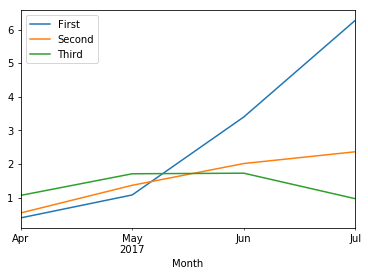

In [19]:
df = df.fillna(value=0)
df = df.cumsum()
df.plot()
plt.xlabel('Month')

Next, `df.to_csv(filename.csv)` and `pd.read_csv(filname.csv)` are easy ways to read in and out data from CSV files. There is similar functions for reading in out and data to excel files and binary files that are just as easy. 

### Pandas Practice

Below are some practice problems on some of the concepts talked about above. Googling is encouraged!
1. Create a random 100x3 Numpy array. Convert it into a Pandas DataFrame. Label the columns 'spend', 'units', 'visits'. Save this data as a CSV named 'python_kpis.csv' in your home directory.
2. Reopen python_kpis.csv from question 1. Add a fourth column, 'city', and randomly assign each row a value from 'Cincinnati', 'Columbus', 'Cleveland', 'Dayton'.
3. Add another column, 'hshd'. Set that column to the row's index plus 1,000,000. So the first household would be 1000000, the second 1000001, etc.
4. Get the number of distinct households in each city (hint: use `group by`).
5. Get the total spend by households whose numbers are divisible by 3 (hint: subset the data with a condition).